In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import normalizar_datos

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = normalizar_datos(X_train)

In [7]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20,50,100,200]:
            for profundidad in [2,3,4,5,6,7,8,9,10]: 
                kf = KFold(n_splits=5)
                for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                    random_forest = RandomForestClassifier(max_depth=profundidad,n_estimators=estimadores,criterion=criterio)
                    random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                    y_pred = random_forest.predict(X.iloc[test_index])
                    metrics.append((profundidad,estimadores,criterio,roc_auc_score(y.iloc[test_index], y_pred)))
                
    df_metrics = pd.DataFrame(metrics, columns=['profundidad','estimadores','criterio','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [8]:
def definir_mejores_hiperparametrosPrueba(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20]:
            for profundidad in [2,3,4]: 
                kf = KFold(n_splits=5)
                metricasDeLaCombinacion = []
                for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                    random_forest = RandomForestClassifier(max_depth=profundidad,n_estimators=estimadores,criterion=criterio)
                    random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                    y_pred = random_forest.predict(X.iloc[test_index])
                    metricasDeLaCombinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                    print(roc_auc_score(y.iloc[test_index], y_pred))
                print(f"promedio de la combinacion {np.mean(metricasDeLaCombinacion)}")
                metrics.append((profundidad,estimadores,criterio,np.mean(metricasDeLaCombinacion)))
                print("termine fold")
    df_metrics = pd.DataFrame(metrics, columns=['profundidad','estimadores','criterio','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [10]:
mejor_combinacion = definir_mejores_hiperparametrosPrueba(X, y)
print(mejor_combinacion)

0.5
0.5
0.5946799082741012
0.5
0.519744503257329
promedio de la combinacion 0.522884882306286
termine fold
0.5935838698165066
0.705545595231571
0.7187018019854347
0.5863233721884258
0.5105944625407166
promedio de la combinacion 0.6229498203525309
termine fold
0.7626311081448112
0.6875785191042494
0.6794577484749315
0.6424197377499599
0.6731239820846905
promedio de la combinacion 0.6890422191117285
termine fold
0.5333247202485512
0.547453332185069
0.5419625564880568
0.5541953533152184
0.5546355863192183
promedio de la combinacion 0.5463143097112227
termine fold
0.6015644915344577
0.6144640867252803
0.61009358211384
0.6709070503780448
0.6157105048859935
promedio de la combinacion 0.6225479431275233
termine fold
0.676065164359287
0.6462959338390917
0.6922379253994081
0.6808295354188598
0.7071203175895766
promedio de la combinacion 0.6805097753212447
termine fold
0.5342499509479028
0.5685406864011565
0.5419625564880568
0.5
0.606051506514658
promedio de la combinacion 0.5501609400703549
ter

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.76      1.00      0.86      6159
   Tiene Alto Valor Adquisitivo       1.00      0.00      0.00      1982

                       accuracy                           0.76      8141
                      macro avg       0.88      0.50      0.43      8141
                   weighted avg       0.82      0.76      0.65      8141



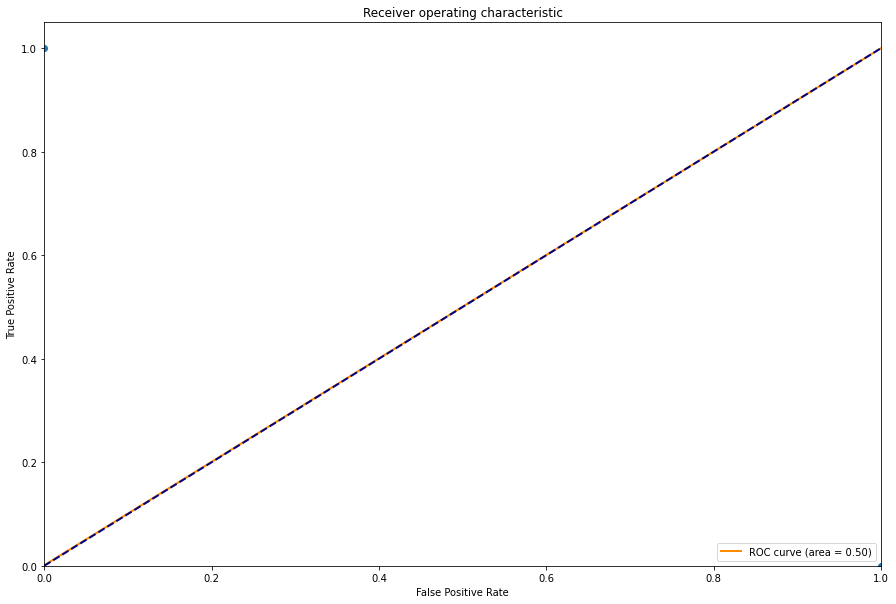

0.5005045408678103

In [11]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
random_forest = RandomForestClassifier(max_depth=parametros_random_forest[0],n_estimators=parametros_random_forest[1],criterion=parametros_random_forest[2])
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)